 Mental Health Prediction Among Students

About Dataset:- A student depression dataset typically contains data aimed at analyzing, understanding, and predicting depression levels among students. It may include features such as demographic information (age, gender), academic performance (grades, attendance), lifestyle habits (sleep patterns, exercise, social activities), mental health history, and responses to standardized depression scales.

**Columns***
ID: Unique identifier for each student.

Age: Age of the student.

Gender: Gender (e.g., Male, Female).

City: Geographic region

CGPA: Grade Point Average or other academic scores.

Sleep Duration: Average daily sleep duration.

Profession:

Work Pressure:

Academic Pressure:

Study Satisfaction:

Job Satisfaction:

Dietary Habits:

**Target Variable**

Depression_Status

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

**Importing Dataset**

In [4]:
df=pd.read_csv('health.csv')
df.head()
               

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  int64  
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  int64  
 5   Work Pressure                          27901 non-null  int64  
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  int64  
 8   Job Satisfaction                       27901 non-null  int64  
 9   Sleep Duration                         27901 non-null  object 
 10  Dietary Habits                         27901 non-null  object 
 11  De

In [6]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# Exploratory Data Analysis (EDA)

In [8]:
df['Depression_mod']=df['Depression'].map({1:'Yes',0:'No'})


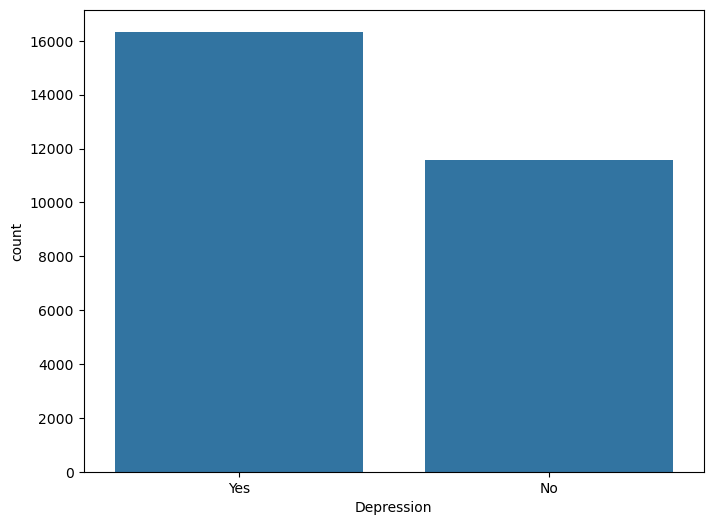

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='Depression_mod',data=df)
plt.xlabel('Depression')
plt.show()

More people reported "Yes" to Depression

The "Yes" category has a significantly higher count than "No".

This suggests that a larger portion of the respondents experience Depression

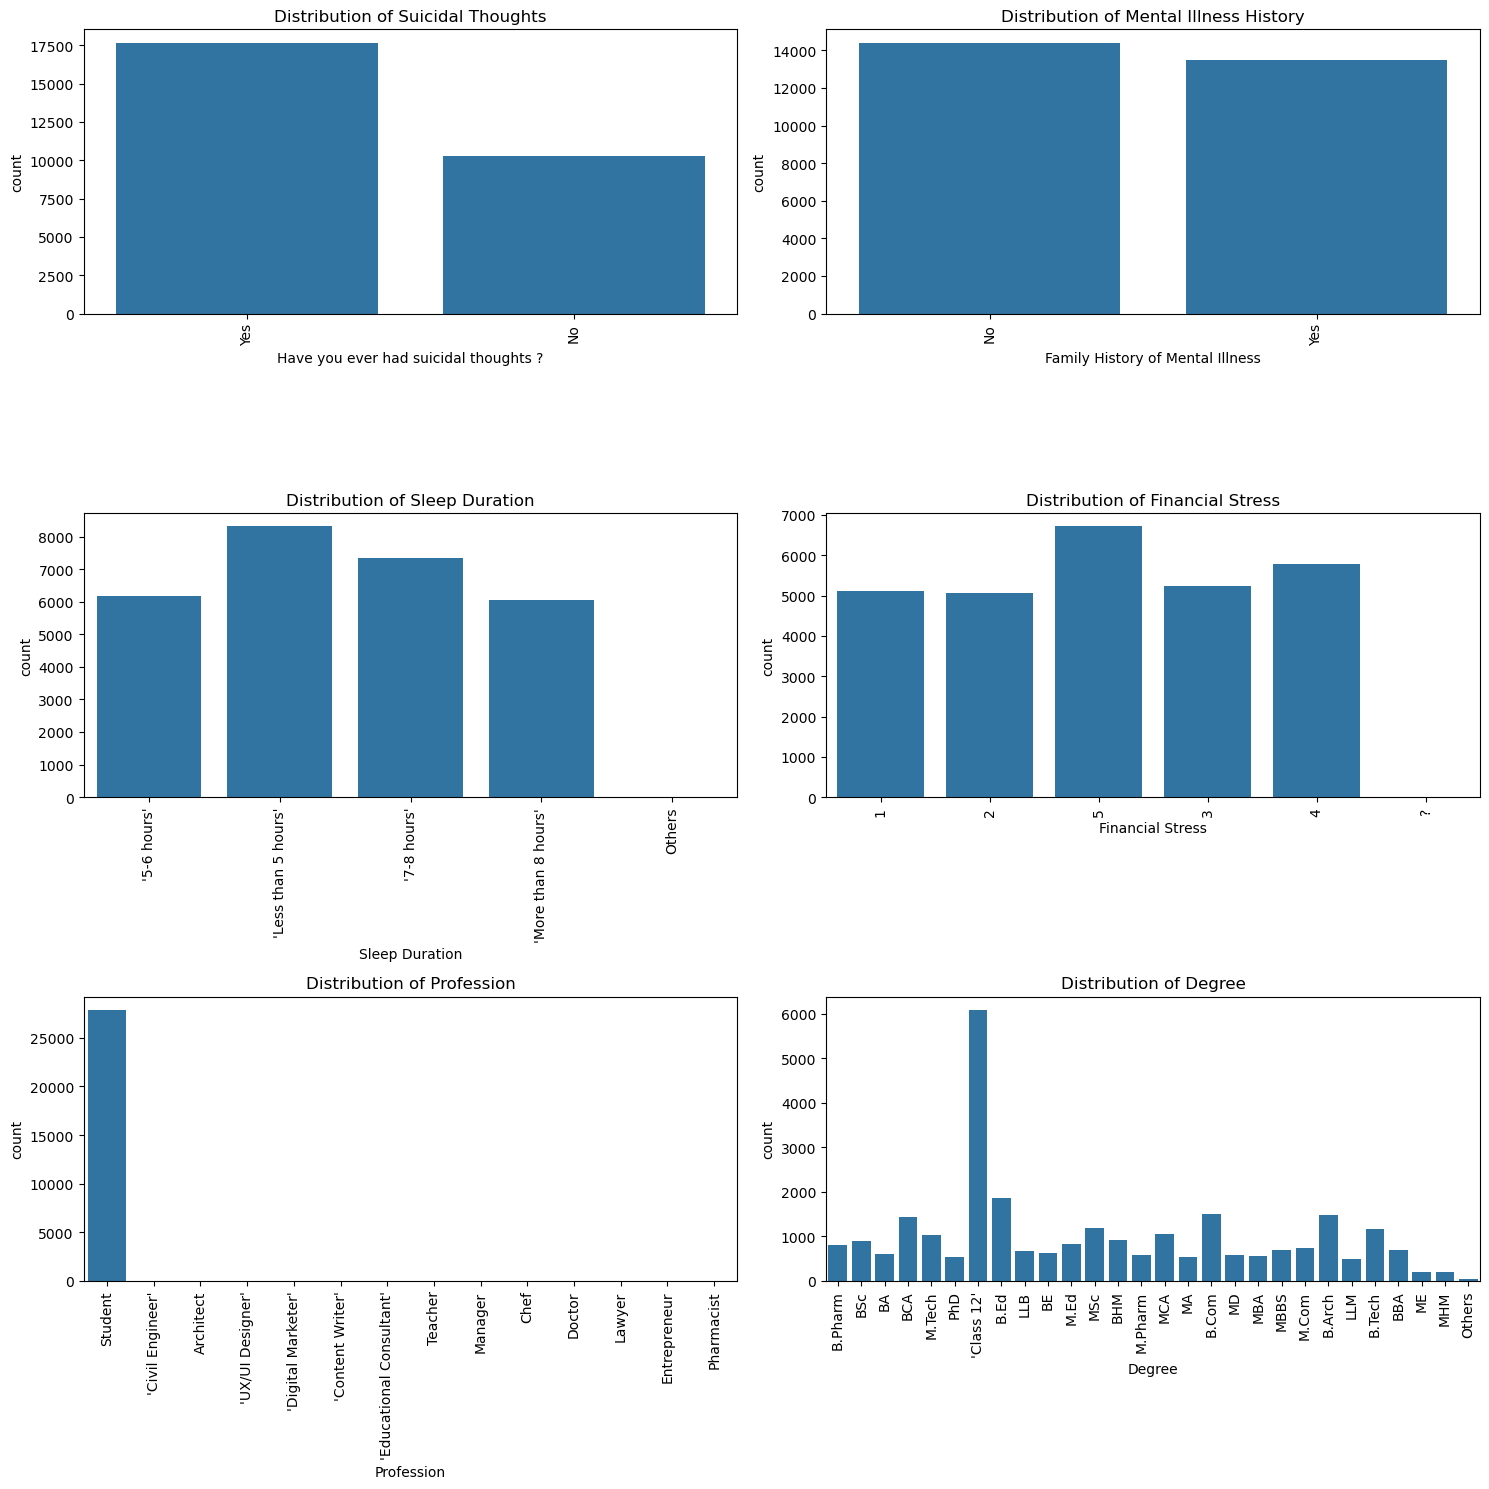

In [11]:

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Returns a 2D array of axes

sns.countplot(x='Have you ever had suicidal thoughts ?', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Suicidal Thoughts')
axes[0, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='Family History of Mental Illness', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Mental Illness History')
axes[0, 1].tick_params(axis='x', rotation=90)

sns.countplot(x='Sleep Duration', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Sleep Duration')
axes[1, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='Financial Stress', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Financial Stress')
axes[1, 1].tick_params(axis='x', rotation=90)


sns.countplot(x='Profession',data=df,ax=axes[2,0])
axes[2, 0].set_title('Distribution of Profession')
axes[2, 0].tick_params(axis='x', rotation=90)

sns.countplot(x='Degree',data=df,ax=axes[2,1])
axes[2, 1].set_title('Distribution of Degree')
axes[2, 1].tick_params(axis='x', rotation=90)


plt.tight_layout() 
plt.show()

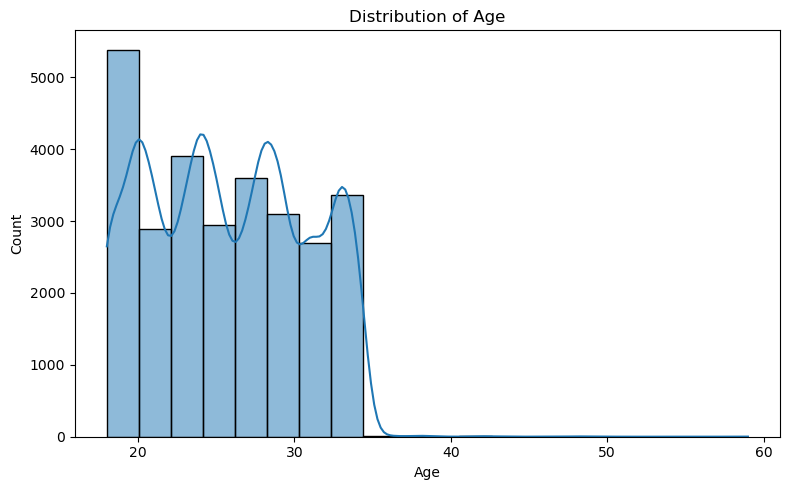

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(x=df['Age'],data=df,kde=True,bins=20)
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()

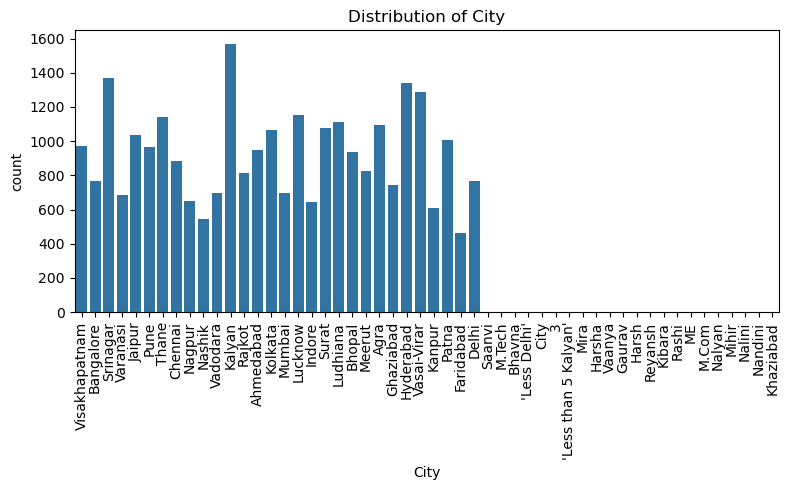

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['City'],data=df)
plt.title('Distribution of City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

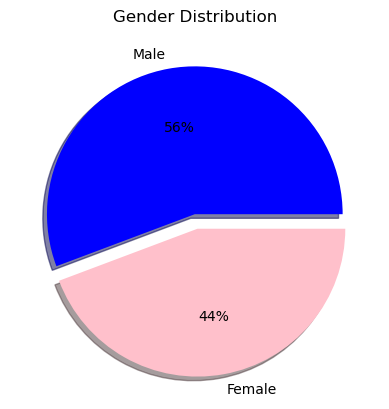

In [14]:
gender_counts = df['Gender'].value_counts()
labels = gender_counts.index  


plt.pie(gender_counts, labels=labels, colors=[ 'blue','Pink'], 
        shadow=True, explode=(0, 0.1), autopct='%1.0f%%')

plt.title('Gender Distribution')





We've more Males 56% than Female  44% in our dataset.


Gender
Female    12354
Male      15547
Name: Depression, dtype: int64 

Gender
Female    7221
Male      9115
Name: Depression, dtype: int64

depression_rate_by_gender  Gender
Female    58.450704
Male      58.628674
Name: Depression, dtype: float64


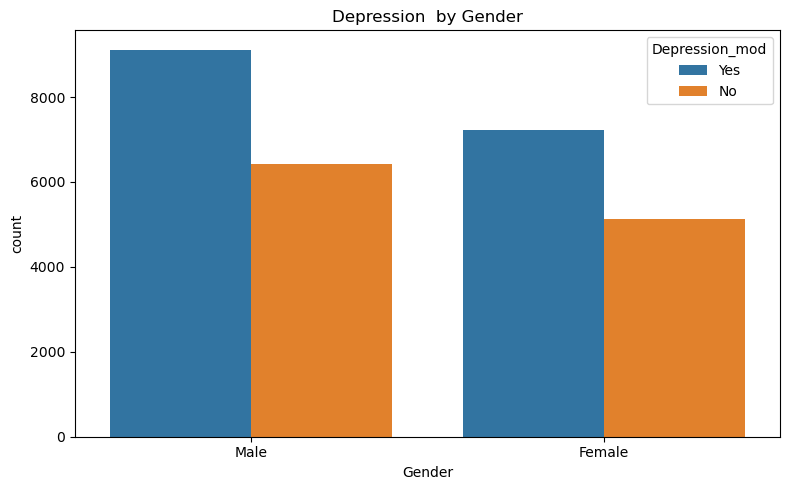

In [16]:
total_by_gender = df.groupby("Gender")["Depression"].count()
depression_by_gender = df.groupby("Gender")["Depression"].sum()
print(total_by_gender,'\n')
print(depression_by_gender)
depression_rate_by_gender = (depression_by_gender / total_by_gender) * 100
print('\ndepression_rate_by_gender ',depression_rate_by_gender)

plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=df,hue="Depression_mod")
plt.title('Depression  by Gender')
plt.tight_layout()
plt.show()

The depression rate is relatively similar between genders, with males showing a slightly higher percentage (58.63%) compared to females (58.45%). This suggests that depression affects both genders almost equally in this dataset


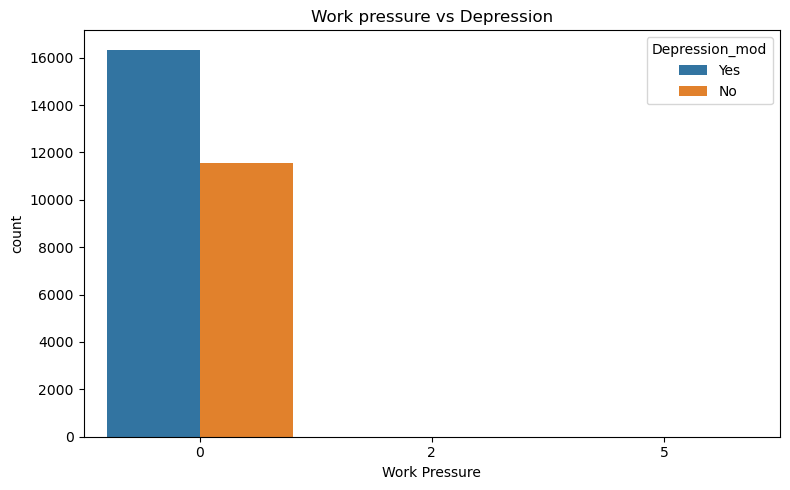

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(x='Work Pressure',data=df,hue="Depression_mod")
plt.title('Work pressure vs Depression')
plt.tight_layout()
plt.show()

Academic Pressure
0       4
1     932
2    1566
3    4489
4    3925
5    5420
Name: Depression, dtype: int64


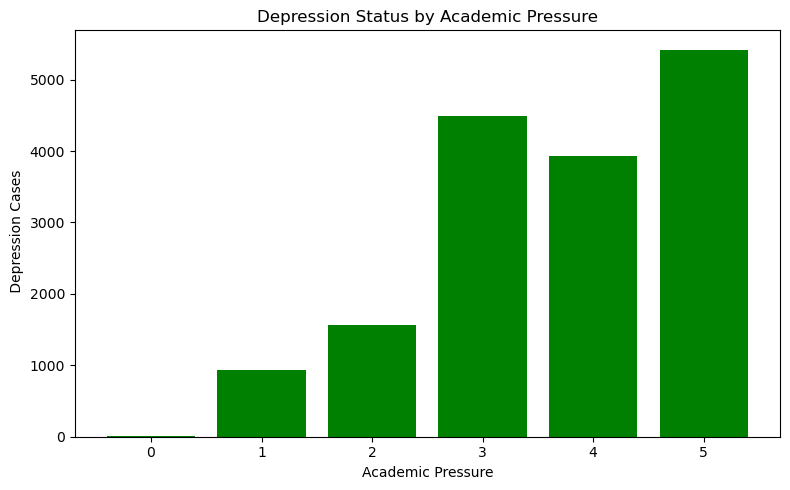

In [19]:
pressure_group = df.groupby("Academic Pressure")["Depression"].sum()
print(pressure_group)
plt.figure(figsize=(8,5))
plt.bar(pressure_group.index, pressure_group.values, color='green')

plt.xlabel("Academic Pressure")
plt.ylabel(" Depression Cases")
plt.title("Depression Status by Academic Pressure")

plt.tight_layout()
plt.show()

The analysis suggests that academic pressure is a significant risk factor for depression, with the most dramatic increase occurring between levels 2 and 3. 

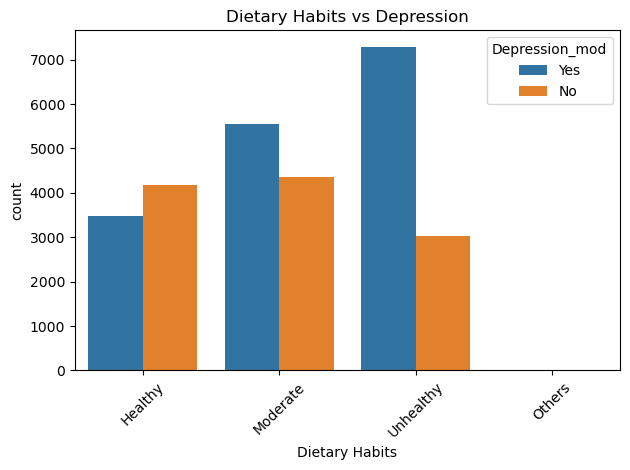

In [21]:
sns.countplot(x='Dietary Habits',data=df,hue="Depression_mod")
plt.title('Dietary Habits vs Depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Those who are following Unhealthy  dietary have more depression.In the Moderate category, the numbers of depressed and non-depressed individuals are relatively close.
However, there is still a slightly higher count of depressed individuals.

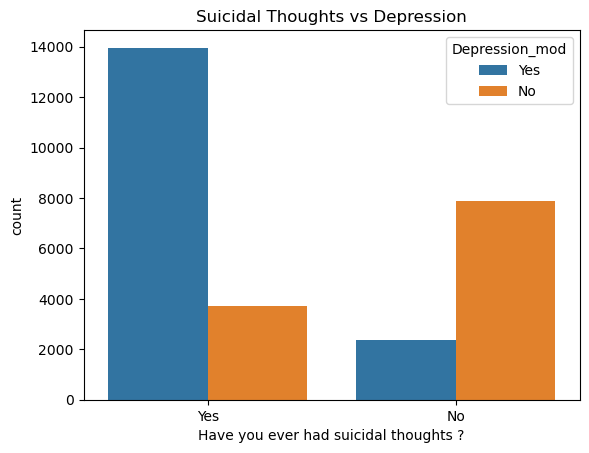

In [23]:
sns.countplot(x='Have you ever had suicidal thoughts ?',data=df,hue="Depression_mod")
plt.title('Suicidal Thoughts vs Depression')
plt.show()

 The  majority of individuals with suicidal thoughts also have depression,  a strong relationship between these conditions

**Mapping**

In [26]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})
df["Dietary Habits"]=df["Dietary Habits"].map({"Healthy":0,"Unhealthy":1,"Moderate":2})
df["Have you ever had suicidal thoughts ?"]=df["Have you ever had suicidal thoughts ?"].map({"Yes":1,"No":0})
df["Family History of Mental Illness"]=df["Family History of Mental Illness"].map({"Yes":1,"No":0})
df["Sleep Duration"]=df["Sleep Duration"].map({"'Less than 5 hours'":0,"'5-6 hours'":1,"'7-8 hours'":2,"'More than 8 hours'":3})

<function matplotlib.pyplot.show(close=None, block=None)>

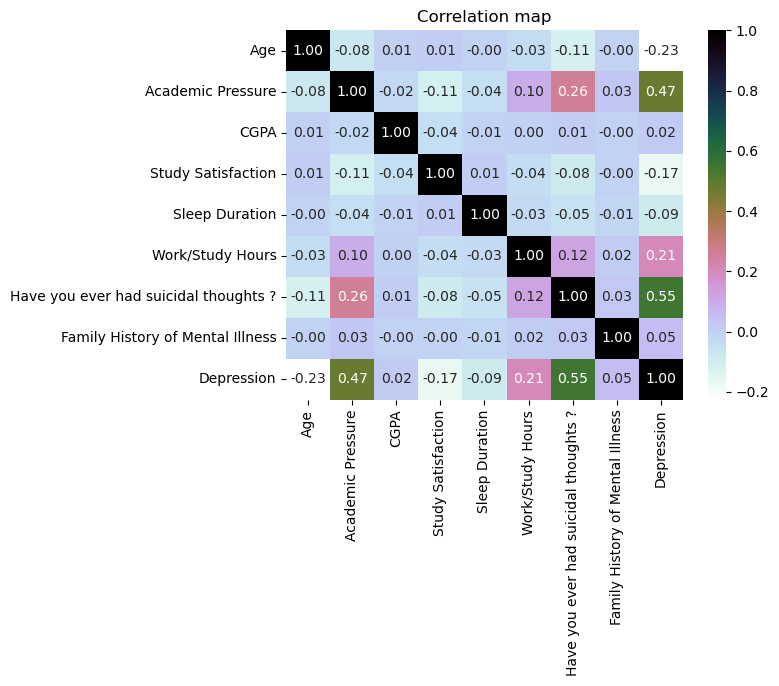

In [27]:
numerical_vars1=df[["Age","Academic Pressure","CGPA","Study Satisfaction","Sleep Duration","Work/Study Hours",'Have you ever had suicidal thoughts ?',
                    'Family History of Mental Illness','Depression']]
corr_result=numerical_vars1.corr()
sns.heatmap(corr_result,annot=True,cmap='cubehelix_r',fmt=".2f")
plt.title('Correlation map')
plt.show

Depression and Suicidal Thoughts (0.55): This is the strongest positive correlation in the dataset

Depression and Academic Pressure (0.47): Higher academic pressure strongly correlates with increased depression levels.

Academic Pressure and Suicidal Thoughts (0.26): There's a moderate positive correlation between academic pressure and suicidal thoughts.

# Outliers

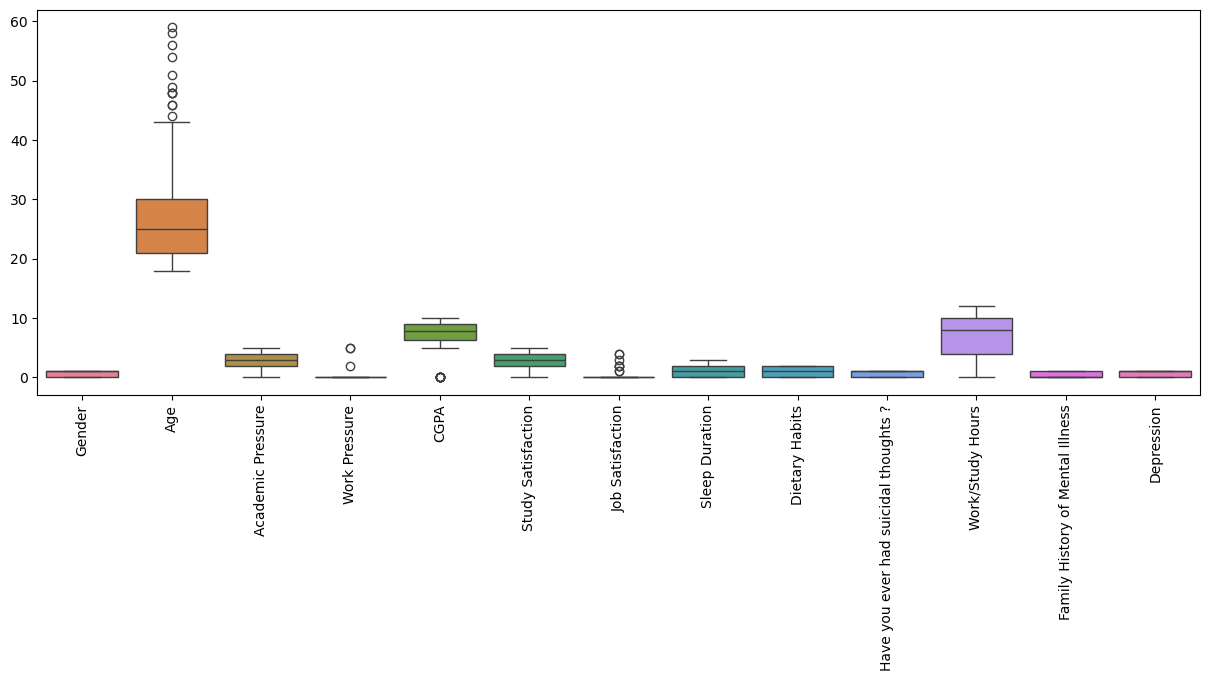

In [30]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [31]:
 numerical_vars=df[['Gender','Age' ,'Academic Pressure' ,'Work Pressure' ,'CGPA' ,'Study Satisfaction' ,'Job Satisfaction' ,'Dietary Habits',
                    'Have you ever had suicidal thoughts ?','Work/Study Hours','Family History of Mental Illness','Depression']]
for var in numerical_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower) | (df[var] > upper)]
    print(f"{var}: {len(outliers)} outliers detected")

    df[var] = np.where(df[var] < lower, lower, np.where(df[var] > upper, upper, df[var]))

   

Gender: 0 outliers detected
Age: 12 outliers detected
Academic Pressure: 0 outliers detected
Work Pressure: 3 outliers detected
CGPA: 9 outliers detected
Study Satisfaction: 0 outliers detected
Job Satisfaction: 8 outliers detected
Dietary Habits: 0 outliers detected
Have you ever had suicidal thoughts ?: 0 outliers detected
Work/Study Hours: 0 outliers detected
Family History of Mental Illness: 0 outliers detected
Depression: 0 outliers detected


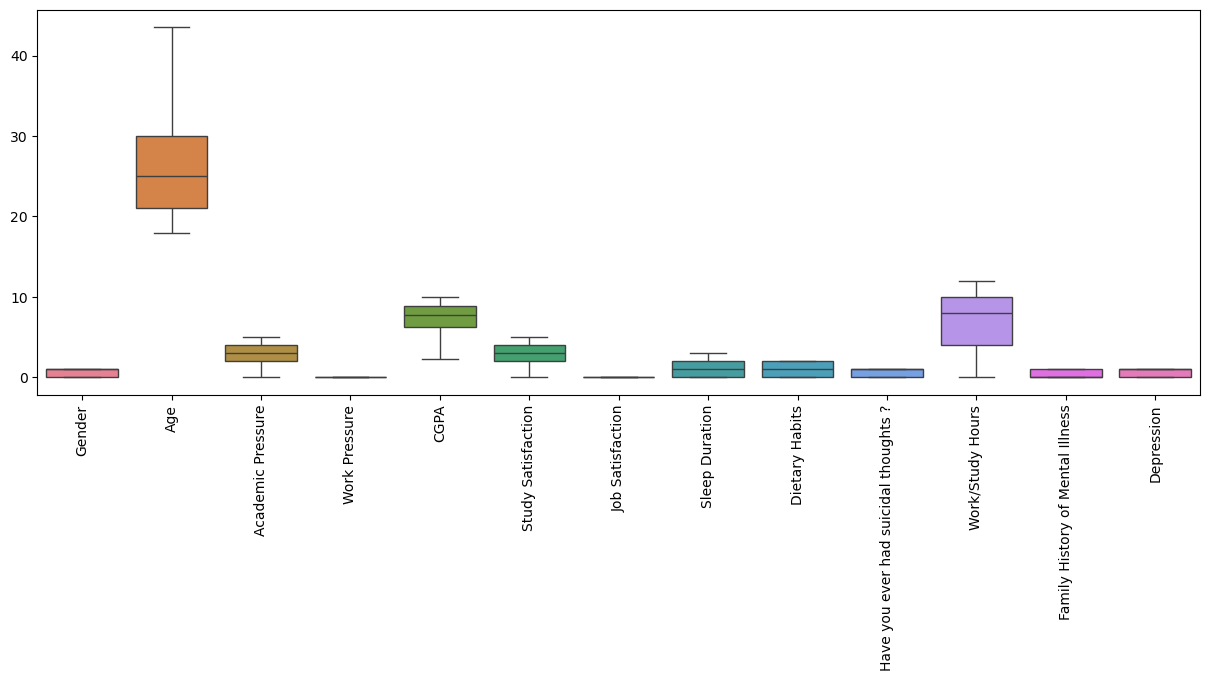

In [32]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Data cleaning

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  float64
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27883 non-null  float64
 10  Dietary Habits                         27889 non-null  float64
 11  De

In [35]:
df.isnull().sum()

Gender                                    0
Age                                       0
City                                      0
Profession                                0
Academic Pressure                         0
Work Pressure                             0
CGPA                                      0
Study Satisfaction                        0
Job Satisfaction                          0
Sleep Duration                           18
Dietary Habits                           12
Degree                                    0
Have you ever had suicidal thoughts ?     0
Work/Study Hours                          0
Financial Stress                          0
Family History of Mental Illness          0
Depression                                0
Depression_mod                            0
dtype: int64

In [36]:
df['Dietary Habits'] = df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0])
df['Sleep Duration'] = df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0])

In [37]:
df.drop(columns=['Depression_mod'], inplace=True)

In [38]:
df.replace('?', 0, inplace=True)


In [39]:
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  float64
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  float64
 10  Dietary Habits                         27901 non-null  float64
 11  De

In [41]:
df['Financial Stress'] =df['Financial Stress'].astype(int) 
df['Depression'] =df['Depression'].astype(int) 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  float64
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Profession                             27901 non-null  object 
 4   Academic Pressure                      27901 non-null  float64
 5   Work Pressure                          27901 non-null  float64
 6   CGPA                                   27901 non-null  float64
 7   Study Satisfaction                     27901 non-null  float64
 8   Job Satisfaction                       27901 non-null  float64
 9   Sleep Duration                         27901 non-null  float64
 10  Dietary Habits                         27901 non-null  float64
 11  De

In [43]:
df.rename(columns={'Have you ever had suicidal thoughts ?':'Suicide thought'},inplace=True)

In [44]:
encode=LabelEncoder()
df['City']=encode.fit_transform(df['City'])
df['Profession']=encode.fit_transform(df['Profession'])
df['Degree']=encode.fit_transform(df['Degree'])


In [45]:
df.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,33.0,51,12,5.0,0.0,8.97,2.0,0.0,1.0,0.0,4,1.0,3.0,1,0.0,1
1,0.0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,1.0,2.0,11,0.0,3.0,2,1.0,0
2,1.0,31.0,44,12,3.0,0.0,7.03,5.0,0.0,0.0,0.0,6,0.0,9.0,1,1.0,0
3,0.0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,2.0,2.0,8,1.0,4.0,5,1.0,1
4,0.0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,1.0,2.0,17,1.0,1.0,1,0.0,0


<function matplotlib.pyplot.show(close=None, block=None)>

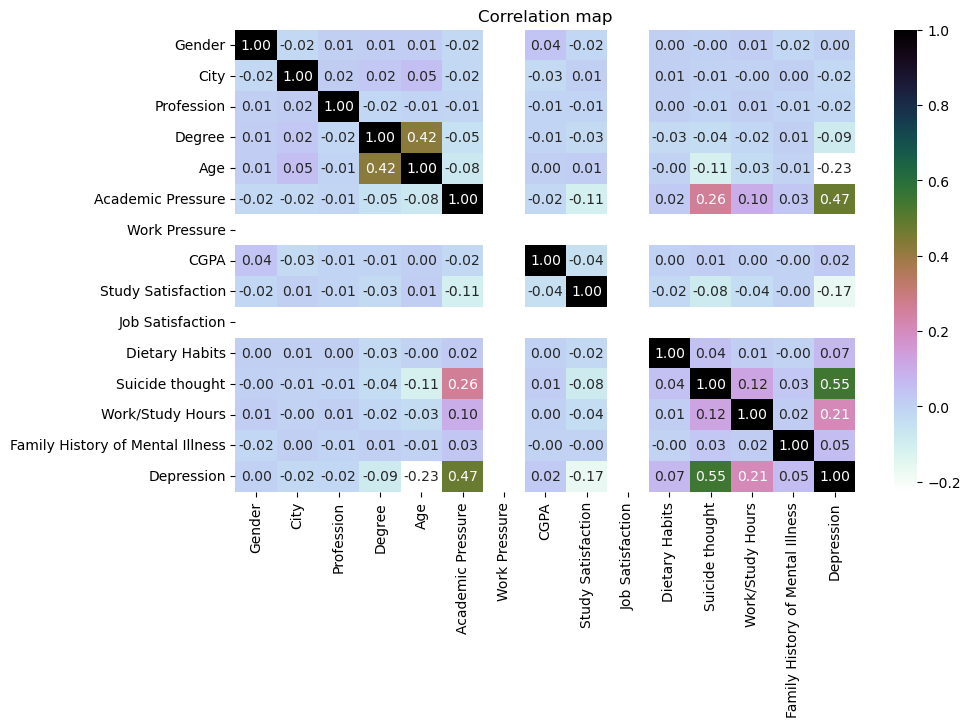

In [46]:
 numerical_vars2=df[['Gender','City','Profession','Degree','Age' ,'Academic Pressure' ,'Work Pressure' ,'CGPA' ,'Study Satisfaction' ,'Job Satisfaction' ,'Dietary Habits',
                    'Suicide thought','Work/Study Hours','Family History of Mental Illness','Depression']]
corr_result1=numerical_vars2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_result1,annot=True,cmap='cubehelix_r',fmt=".2f")
plt.title('Correlation map')
plt.show

In [47]:
df=df.drop(columns=['City','Profession','Work Pressure','Job Satisfaction'])
df.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide thought,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1.0,33.0,5.0,8.97,2.0,1.0,0.0,4,1.0,3.0,1,0.0,1
1,0.0,24.0,2.0,5.90,5.0,1.0,2.0,11,0.0,3.0,2,1.0,0
2,1.0,31.0,3.0,7.03,5.0,0.0,0.0,6,0.0,9.0,1,1.0,0
3,0.0,28.0,3.0,5.59,2.0,2.0,2.0,8,1.0,4.0,5,1.0,1
4,0.0,25.0,4.0,8.13,3.0,1.0,2.0,17,1.0,1.0,1,0.0,0


# Model Building 

**Splitting dataset**

In [50]:
X = df.drop(columns=["Depression"])
y = df["Depression"]

In [51]:
X


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicide thought,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,33.0,5.0,8.97,2.0,1.0,0.0,4,1.0,3.0,1,0.0
1,0.0,24.0,2.0,5.90,5.0,1.0,2.0,11,0.0,3.0,2,1.0
2,1.0,31.0,3.0,7.03,5.0,0.0,0.0,6,0.0,9.0,1,1.0
3,0.0,28.0,3.0,5.59,2.0,2.0,2.0,8,1.0,4.0,5,1.0
4,0.0,25.0,4.0,8.13,3.0,1.0,2.0,17,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
27896,0.0,27.0,5.0,5.75,5.0,1.0,1.0,0,1.0,7.0,1,1.0
27897,1.0,27.0,2.0,9.40,3.0,0.0,0.0,25,0.0,0.0,3,1.0
27898,1.0,31.0,3.0,6.61,4.0,1.0,1.0,22,0.0,12.0,2,0.0
27899,0.0,18.0,5.0,6.88,2.0,0.0,0.0,0,1.0,10.0,5,0.0


In [52]:
y

0        1
1        0
2        0
3        1
4        0
        ..
27896    0
27897    0
27898    0
27899    1
27900    1
Name: Depression, Length: 27901, dtype: int32

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (22320, 12)
X_test: (5581, 12)
y_train: (22320,)
y_test: (5581,)


**Standardization**

In [55]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)


**model training**

In [57]:
models={
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42)
}

In [58]:
result={}
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    result[name]=acc
    
    cm=confusion_matrix(y_test,y_pred)
    print(f'{name}=accuracy score:{acc:.3f}')
    print(cm)
    

Logistic Regression=accuracy score:0.848
[[1826  455]
 [ 396 2904]]
Decision Tree=accuracy score:0.827
[[1669  612]
 [ 354 2946]]
Random Forest=accuracy score:0.838
[[1741  540]
 [ 365 2935]]
KNN=accuracy score:0.821
[[1726  555]
 [ 442 2858]]
SVM=accuracy score:0.847
[[1818  463]
 [ 390 2910]]


**Best model**

In [60]:
best_model = max(result, key=result.get)
print(f"\nBest Model: {best_model} with Accuracy: {result[best_model]:.3f}")


Best Model: Logistic Regression with Accuracy: 0.848
